## **OPENING AND LOADING THE DATASET**

In [ ]:
import h5py
hfx = h5py.File('DataX.h5', 'r')
hfy = h5py.File('DataY.h5', 'r')
print(list(hfx.keys()))
print(list(hfy.keys()))

['X']
['labels']


In [ ]:
import numpy as np
x = np.asarray(hfx['X'])
print(x.shape)

(4511, 16, 112, 112, 3)


In [ ]:
import numpy as np
y = np.asarray(hfy['labels'])
y.shape

(4511, 10)

In [ ]:
hfx.close()
hfy.close()

## **SPLITTING THE DATASET INTO TRAINING, VALIDATION AND TESTING**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(x, y, test_size=0.2, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size=0.5, stratify=y_val)
del x,y

In [ ]:
print(X_train.shape)
print(y_train.shape)
print()
print(X_val.shape)
print(y_val.shape)
print()
print(X_test.shape)
print(y_test.shape)

(3608, 16, 112, 112, 3)
(3608, 10)

(451, 16, 112, 112, 3)
(451, 10)

(452, 16, 112, 112, 3)
(452, 10)


## **C3D ARCHITECTURE**

In [ ]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Flatten
from keras.layers import Convolution3D, MaxPooling3D, ZeroPadding3D, BatchNormalization, GlobalAveragePooling3D
from keras.utils import plot_model

def get_model():
    model = Sequential()
    model.add(Convolution3D(64, (3, 3, 3), activation='relu',
                            border_mode='same', name='conv1',
                            subsample=(1, 1, 1),
                            input_shape=(16, 112, 112, 3)))
    model.add(BatchNormalization())
    model.add(MaxPooling3D(pool_size=(1, 2, 2), strides=(1, 2, 2),
                           border_mode='valid', name='pool1'))
    model.add(Convolution3D(128, (3, 3, 3), activation='relu',
                            border_mode='same', name='conv2',
                            subsample=(1, 1, 1)))
    model.add(BatchNormalization())
    model.add(MaxPooling3D(pool_size=(2, 2, 2), strides=(2, 2, 2),
                           border_mode='valid', name='pool2'))
    model.add(Convolution3D(256, (3, 3, 3), activation='relu',
                            border_mode='same', name='conv3a',
                            subsample=(1, 1, 1)))
    model.add(Convolution3D(256, (3, 3, 3), activation='relu',
                            border_mode='same', name='conv3b',
                            subsample=(1, 1, 1)))
    model.add(BatchNormalization())
    model.add(MaxPooling3D(pool_size=(2, 2, 2), strides=(2, 2, 2),
                           border_mode='valid', name='pool3'))
    model.add(Convolution3D(512, (3, 3, 3), activation='relu',
                            border_mode='same', name='conv4a',
                            subsample=(1, 1, 1)))
    model.add(Convolution3D(512, (3, 3, 3), activation='relu',
                            border_mode='same', name='conv4b',
                            subsample=(1, 1, 1)))
    model.add(BatchNormalization())
    model.add(MaxPooling3D(pool_size=(2, 2, 2), strides=(2, 2, 2),
                           border_mode='valid', name='pool4'))
    model.add(Convolution3D(512, (3, 3, 3), activation='relu',
                            border_mode='same', name='conv5a',
                            subsample=(1, 1, 1)))
    model.add(Convolution3D(512, (3, 3, 3), activation='relu',
                            border_mode='same', name='conv5b',
                            subsample=(1, 1, 1)))
    model.add(BatchNormalization())
    model.add(GlobalAveragePooling3D())
    model.add(Dropout(.5))
    model.add(Dense(10, activation='softmax'))

    print(model.summary())
    return model

model = get_model()

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv3D` call to the Keras 2 API: `Conv3D(64, (3, 3, 3), activation="relu", name="conv1", input_shape=(16, 112, ..., strides=(1, 1, 1), padding="same")`
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `MaxPooling3D` call to the Keras 2 API: `MaxPooling3D(pool_size=(1, 2, 2), strides=(1, 2, 2), name="pool1", padding="valid")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Conv3D` call to the Keras 2 API: `Conv3D(128, (3, 3, 3), activation="relu", name="conv2", strides=(1, 1, 1), padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: UserWarning: Update your `MaxPooling3D` call to the Keras 2 API: `MaxPooling3D(pool_size=(2, 2, 2), strides=(2, 2, 2), name="pool2", padding="valid")`
/usr/local/lib/python

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv3D)               (None, 16, 112, 112, 64)  5248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 16, 112, 112, 64)  256       
_________________________________________________________________
pool1 (MaxPooling3D)         (None, 16, 56, 56, 64)    0         
_________________________________________________________________
conv2 (Conv3D)               (None, 16, 56, 56, 128)   221312    
_________________________________________________________________
batch_normalization_2 (Batch (None, 16, 56, 56, 128)   512       
_________________________________________________________________
pool2 (MaxPooling3D)         (None, 8, 28, 28, 128)    0         
_________________________________________________________________
conv3a (Conv3D)              (None, 8, 28, 28, 256)   

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:38: UserWarning: Update your `MaxPooling3D` call to the Keras 2 API: `MaxPooling3D(pool_size=(2, 2, 2), strides=(2, 2, 2), name="pool4", padding="valid")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:41: UserWarning: Update your `Conv3D` call to the Keras 2 API: `Conv3D(512, (3, 3, 3), activation="relu", name="conv5a", strides=(1, 1, 1), padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:44: UserWarning: Update your `Conv3D` call to the Keras 2 API: `Conv3D(512, (3, 3, 3), activation="relu", name="conv5b", strides=(1, 1, 1), padding="same")`


## **HYPERTUNING**

In [ ]:
import matplotlib.pyplot as plt
from keras.optimizers import SGD
from keras.utils import plot_model
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

learning_rate = 0.001
momentum = 0.9
patienceLR = 3
factor = 0.1
batch_size = 32
epochs = 50

checkpoint = ModelCheckpoint("yoga.h5",
                             monitor = 'val_accuracy',
                             mode = 'max',
                             save_best_only = True,
                             verbose = 1)

reduce_lr = ReduceLROnPlateau(monitor = 'val_loss',
                              factor = factor,
                              mode = 'min',
                              patience = patienceLR,
                              verbose = 1)

callbacks = [checkpoint, reduce_lr]

## **TRAINING THE MODEL**

In [ ]:
model.compile(loss = 'categorical_crossentropy', optimizer = SGD(lr=learning_rate, momentum=momentum, nesterov=True), metrics = ['accuracy'])

In [ ]:
history = model.fit(X_train, y_train,
                    validation_data = (X_val, y_val),
                    epochs = epochs, batch_size = batch_size//2,
                    verbose = 1, callbacks = callbacks)

Train on 3608 samples, validate on 451 samples
Epoch 1/50
3608/3608 [==============================] - 168s 47ms/step - loss: 2.0946 - accuracy: 0.2461 - val_loss: 4.4181 - val_accuracy: 0.1086

Epoch 00001: val_accuracy improved from -inf to 0.10865, saving model to yoga.h5
Epoch 2/50
3608/3608 [==============================] - 158s 44ms/step - loss: 1.7278 - accuracy: 0.3805 - val_loss: 3.0047 - val_accuracy: 0.1796

Epoch 00002: val_accuracy improved from 0.10865 to 0.17960, saving model to yoga.h5
Epoch 3/50
3608/3608 [==============================] - 158s 44ms/step - loss: 1.3884 - accuracy: 0.5164 - val_loss: 2.4303 - val_accuracy: 0.2705

Epoch 00003: val_accuracy improved from 0.17960 to 0.27051, saving model to yoga.h5
Epoch 4/50
3608/3608 [==============================] - 158s 44ms/step - loss: 1.0586 - accuracy: 0.6366 - val_loss: 1.3696 - val_accuracy: 0.5277

Epoch 00004: val_accuracy improved from 0.27051 to 0.52772, saving model to yoga.h5
Epoch 5/50
3608/3608 [======

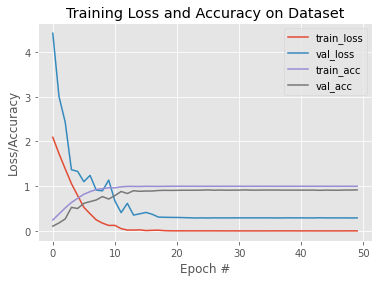

In [ ]:
N = epochs
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), history.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), history.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), history.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), history.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy on Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="upper right")
plt.savefig("plot.png")

## **PREDICTION VIA MODEL**

In [ ]:
from keras.models import load_model
model = load_model('yoga.h5')

In [ ]:
prediction = []
prediction.append(model.predict(X_test, batch_size=batch_size//2, verbose=1))

452/452 [==============================] - 7s 15ms/step


In [ ]:
final = []
for i in range(len(prediction[0])):
  a = prediction[0][i]
  b = np.zeros_like(a)
  max_arg = a.argmax(0)
  for j in range(10):
    if j == max_arg:
      b[j] = 1
    else:
      b[j] = 0
  final.append(b.astype('uint8'))

In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(np.argmax(y_test,axis=1), np.argmax(final, axis=1)))

[[37  0  0  1  0  0  0  0  0  3]
 [ 1 62  0  0  1  2  0  0  0  0]
 [ 0  1 48  0  0  0  0  1  1  0]
 [ 1  2  2 34  0  1  0  1  0  2]
 [ 0  0  0  0 29  0  0  0  0  0]
 [ 1  1  0  2  0 48  0  0  0  3]
 [ 0  0  0  0  2  0 42  0  0  2]
 [ 0  2  1  0  1  0  0 35  0  0]
 [ 0  0  0  0  1  0  0  0 30  0]
 [ 0  0  0  1  0  3  1  0  0 46]]


## **TESTING ON A VIDEO**

In [ ]:
index_names = ['Garland Pose', 'Happy Baby Pose', 'Head To Knee Pose', 'Lunge Pose', 'Mountain Pose', 'Plank Pose', 'Raised Arms Pose', 'Seated Forward Bend', 'Staff Pose', 'Seated Forward Bend']

In [ ]:
import cv2
import time
import numpy as np

names = ['sample11.mp4']

for name in names:

  print(name)
  start_time = time.time()

  vs = cv2.VideoCapture(name)
  pred = []
  results = []
  writer = None

  while True:
      (grabbed, frame) = vs.read()
      if not grabbed:
          break

      #output = frame.copy()
      #output = cv2.resize(output, (1280, 720), cv2.INTER_AREA)

      frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
      frame = cv2.resize(frame, (112, 112), cv2.INTER_AREA)
      frame = (frame / 255.).astype('float32')
      pred.append(frame)

      if len(pred) == 16:
        p = model.predict(np.expand_dims(pred, axis=0))
        pos = p.argmax()
        if p[0][pos] > 0.5:
          label = index_names[pos]

        #output = cv2.putText(output, label, (180, 120), cv2.FONT_HERSHEY_SIMPLEX, 1.2, (0, 0, 0), 4)
        pred.pop(0)
        print(label)
        print("--- %s seconds ---" % (time.time() - start_time))

      #if writer is None:
        #fourcc = cv2.VideoWriter_fourcc(*'MJPG')
        #writer = cv2.VideoWriter('Output '+name, fourcc, 30, (1280, 720), True)
      #writer.write(output)

  #writer.release()
  vs.release()

sample11.mp4
Lunge Pose
--- 0.668281078338623 seconds ---
Lunge Pose
--- 0.7137174606323242 seconds ---
Lunge Pose
--- 0.7622120380401611 seconds ---
Lunge Pose
--- 0.8066744804382324 seconds ---
Lunge Pose
--- 0.8544330596923828 seconds ---
Lunge Pose
--- 0.9029445648193359 seconds ---
Lunge Pose
--- 0.953188419342041 seconds ---
Lunge Pose
--- 0.997138500213623 seconds ---
Lunge Pose
--- 1.0453522205352783 seconds ---
Lunge Pose
--- 1.0935723781585693 seconds ---
Lunge Pose
--- 1.1422960758209229 seconds ---
Lunge Pose
--- 1.1859302520751953 seconds ---
Lunge Pose
--- 1.2305006980895996 seconds ---
Lunge Pose
--- 1.2797682285308838 seconds ---
Lunge Pose
--- 1.325268030166626 seconds ---
Lunge Pose
--- 1.370790958404541 seconds ---
Lunge Pose
--- 1.4137914180755615 seconds ---
Lunge Pose
--- 1.4579291343688965 seconds ---
Lunge Pose
--- 1.5068998336791992 seconds ---
Lunge Pose
--- 1.555168867111206 seconds ---
Lunge Pose
--- 1.6018996238708496 seconds ---
Lunge Pose
--- 1.6457583904